# Convolutional Neural Networks Fundamentals (CNN)

Compiled by:
Christopher Monterola

Lecture is taken from:

**1. Python Machine Learning, Second Edition, Sebastian Raschka and Vahid Mirjalili, Packt Publishing Ltd. Birmingham B3 2PB, UK Sept 2017.**

**2. Hands-On Machine Learning with Scikit-Learn and TensorFlow, Aurélien Géron, O'Reilly 2017.**

**3. Deep Learning with Python, Francois Chollet, Manning New York 2018.**

In this notebook, we'll now learn about Convolutional Neural Networks (CNNs or COVNET), and how we can implement CNNs in TensorFlow/Keras. We'll also take an interesting journey as we apply this type of deep neural network architecture to image classification. We'll start by discussing the basic building blocks of CNNs, using a bottom up approach. Then we'll take a deeper dive into the CNN architecture and how to implement deep CNNs in TensorFlow. Along the way we'll be covering the following topics:       

• Understanding convolution operations in one and two dimensions    
• Learning about the building blocks of CNN architectures    
• Implementing deep convolutional neural networks in TensorFlow    


## 1. General Introduction: Building blocks of convolutional neural networks  

Convolutional neural networks, or CNNs, are a family of models that were inspired by how the **visual cortex of human brain** works when recognizing objects. The development of CNNs goes back to the 1990's, when Yann LeCun and his colleagues proposed a novel neural network architecture for classifying handwritten digits from images (Handwritten Digit Recognition with a Back-Propagation Network, Y LeCun, and others, 1989, published at Neural Information Processing Systems(NIPS) conference). Due to the outstanding performance of CNNs for image classification tasks, they have gained a lot of attention and this led to tremendous improvements in machine learning and computer vision applications.      

In the following sections, we next see how CNNs are used as feature extraction engines, and then we'll delve into the theoretical definition of convolution and computing convolution in one and two dimensions. 

### Understanding CNNs and learning feature hierarchies

Successfully **extracting salient (relevant) features** is key to the performance of any machine learning algorithm, of course, and traditional machine learning models rely on input features that may come from a domain expert, or are based on computational feature extraction techniques. Neural networks are able to automatically learn the features from raw data that are most useful for a particular task. For this reason, it's common to consider a neural network as a feature extraction engine: the **early layers** (those right after the input layer) extract **low level features**.     

Multilayer neural networks, and in particular, deep convolutional neural networks, construct a so-called feature hierarchy by combining the low-level features in a layer-wise fashion to form high-level features. For example, if we're dealing with images, then low-level features, such as edges and blobs, are extracted from the earlier layers, which are combined together to form high-level features – as object shapes like a building, a car, or a dog.    

As you can see in the following image, a CNN computes feature maps from an input image, where each element comes from a local patch of pixels in the input image:

<img src="./images/CNN_dog.png" width="700">

perform very well for image-related tasks, and that's largely due to two important ideas:     

• **Sparse-connectivity:** A single element in the feature map is connected to only a small patch of pixels. (This is very different from connecting to the whole input image, in the case of perceptrons. You may find it useful to look back and compare how we implemented a fully connected network that connected to the whole image.)    

• **Parameter-sharing:** The same weights are used for different patches of the input image. As a direct consequence of these two ideas, the number of weights (parameters) in the network decreases dramatically, and we see an improvement in the ability to capture salient features. Intuitively, it makes sense that *nearby pixels are probably more relevant to each other* than pixels that are far away from each other.

Typically, CNNs are composed of *several Convolutional (conv)* layers and *subsampling (also known as Pooling (P))* layers that are followed by one or more Fully Connected (FC) layers at the end. The fully connected layers are essentially a multilayer perceptron, where every input unit $i$ is connected to every output unit $j$ with weight $w_{ij}$ (which we learned previously).

In the following sections, we'll study convolutional and pooling layers in more detail and see how they work. To understand how convolution operations work, let's start with a convolution in one dimension before working through the typical two-dimensional cases as applications for two-dimensional images later.


## 2. Performing discrete convolutions

A discrete convolution (or simply convolution) is a fundamental operation in a CNN. Therefore, it's important to understand how this operation works. In this section, we'll learn the mathematical definition and discuss some of the naive algorithms to compute convolutions of two one-dimensional vectors or two twodimensional
matrices.  

Please note that this description is solely for understanding how a convolution works. Indeed, much more efficient implementations of convolutional operations already exist in packages such as TensorFlow, as we will implement eventually.

### 2.1 Performing a discrete convolution in one dimension

Let's start with some basic definitions and notations we are going to use. A discrete convolution for two one-dimensional vectors $\mathbf{x}$ and $\mathbf{w}$ is denoted by $\mathbf{y}= \mathbf{x}*\mathbf{w}$ , in which vector $\mathbf{x}$ is our input (sometimes called signal) and $\mathbf{w}$ is called the filter or kernel. A discrete convolution is mathematically defined as follows:   

\begin{equation}
\mathbf{y}= \mathbf{x} * \mathbf{w} = \sum_{k=-\infty}^{k=+\infty} \mathbf{x} [i-k] \mathbf{w}[k]
\end{equation}

Here, the brackets [...] are used to denote the indexing for vector elements. The index $i$ runs through each element of the output vector $\mathbf{y}$. There are two odd things in the preceding formula that we need to clarify: $−\infty$ to $+\infty$ indices and negative indexing for $\mathbf{x}$.

The **first issue** where the **sum runs through indices from $−\infty$ to $+\infty$** seems odd mainly because in machine learning applications, we always deal with finite feature vectors. For example, if $\mathbf{x}$ has 10 features with indices 0,1,2,…,8,9, then indices $−\infty:-1$ and $10 : +\infty$ are out of bounds for $\mathbf{x}$. Therefore, to correctly compute the summation shown in the preceding formula, it is assumed that $\mathbf{x}$ and $\mathbf{w}$ are filled with zeros. This will result in an output vector $\mathbf{y}$ that also has infinite size with lots of zeros as well. Since this is not useful in practical situations, $\mathbf{x}$ is padded only with a
finite number of zeros.   

This process is called **zero-padding** or simply **padding**. Here, the number of zeros padded on each side is denoted by *p*. An example padding of a one-dimensional vector $\mathbf{x}$ is shown in the following figure:

<img src="./images/zero-padding.png" width="500">


Let's assume that the original input $\mathbf{x}$ and filter $\mathbf{w}$ have $n$ and $m$ elements, respectively, where $m \leq n$. Therefore, the padded vector $\mathbf{x}^p$  has size $n + 2p$. Then, the practical formula for computing a discrete convolution will change to the following:


\begin{equation}
\mathbf{y}= \mathbf{x} * \mathbf{w} \Rightarrow \mathbf{y}[i]= \sum_{k=0}^{k=m-1} \mathbf{x}^p [i+m-k] \mathbf{w}[k]
\end{equation}


Now that we have solved the infinite index issue, the second issue is indexing $\mathbf{x}$ with $i + m - k$. The important point to notice here is that $\mathbf{x}$ and $\mathbf{w}$ are indexed in different directions in this summation. For this reason, we can flip one of those vectors, $\mathbf{x}$ or $\mathbf{w}$, after they are padded. Then, we can simply compute their dot product.    

Let's assume we flip the filter $\mathbf{w}$ to get the rotated filter $\mathbf{w}^r$ . Then, the dot product $\mathbf{x}[i : i + m]$ $\cdot$ $\mathbf{w}^r$ is computed to get one element $\mathbf{y}[i]$, where $\mathbf{x}[i : i + m]$ is a patch of $\mathbf{x}$ with size $m$.

This operation is repeated like in a sliding window approach to get all the output elements. The following figure provides an example with $\mathbf{x} = (3,2,1,7,1,2,5,4)$ and $\mathbf{w}$ = ($\frac{1}{2}, \frac{3}{4}, 1, \frac{1}{4}$) so that the first three output elements are computed:

<img src="./images/padding_illustration.png" width="700">

You can see in the preceding example that the padding size is zero ($p = 0$). Notice that the rotated filter wr is shifted by two cells each time we shift. This shift is another hyperparameter of a convolution, the stride $s$. In this example, the **stride is two**, $s = 2$. Note that the stride has to be a positive number smaller than the size of the input vector $\mathbf{x}$ (pause and answer why?). We'll talk more about padding and strides in the next section!

### The effect of zero-padding in a convolution

So far here, we've used zero-padding in convolutions to compute finite-sized output vectors. Technically, padding can be applied with any $p\ge0$ . Depending on the choice $p$, boundary cells may be treated differently than the cells located in the middle of $\mathbf{x}$.   


Now consider an example where $n = 5$ (number of elements in $\mathbf{x}$), $m = 3$ (number of elements in $\mathbf{w}$. Then, $p = 0$, $\mathbf{x}[0]$ is only used in computing one output element (for instance, $\mathbf{y}[0]$), while $\mathbf{x}[1]$ is used in the computation of two output elements (for   instance, $\mathbf{y}[0]$ and $\mathbf{y}[1]$). So, you can see that this different treatment of elements of $\mathbf{x}$ can artificially put more emphasis on the middle element, $\mathbf{x}[2]$ , since it has appeared in most computations. We can avoid this issue if we choose $p = 2$, in which case, each element of $\mathbf{x}$ will be involved in
computing three elements of $\mathbf{y}$.   


Furthermore, the size of the output $\mathbf{y}$ also depends on the choice of the padding strategy we use. There are three modes of padding that are commonly used in practice: **full**, **same**, and **valid**:

• In the **full mode**, the padding parameter $p$ is set to $p = m - 1$. Full padding increases the dimensions of the output; thus, it is rarely used in convolutional neural network architectures. An increasing dimension has problems with control of architectures and generalization (as it tends to overfit).

• **Same padding** is usually used if you want to have the size of the output ($\mathbf{y}$) the same as the input vector $\mathbf{x}$. In this case, the padding parameter $p$ is computed according to the filter size, along with the requirement that the input size and output size are the same.

• Finally, computing a convolution in the **valid mode** refers to the case where $p = 0$ (no padding).

The following figure illustrates the three different padding modes for a simple $5 \times 5$ pixel input with a kernel size of $3 \times 3$ and a stride of $1$:

<img src="./images/different_padding.png" width="700">

IMPORTANT NOTE: The most commonly used padding mode in convolutional neural networks is same padding. One of its advantages over the other padding modes is that same padding preserves the height and width of the input images or tensors, which makes designing a network architecture more convenient.  

One big disadvantage of the valid padding versus full and same padding, for example, is that the volume of the tensors would decrease substantially in neural networks with many layers, which can be detrimental to the network performance. 

In practice, it is recommended that you preserve the spatial size using same padding for the convolutional layers and  decrease the spatial size via pooling layers instead (*kapit lang/hold on, we will learn this in Section 3 below!*). As for the full padding, its size results in an output larger than the input size. Full padding is usually used in signal processing applications where it is important to minimize  boundary effects. **However, in deep learning context, boundary effect is not usually an issue**, so we rarely see full padding.

### Determining the size of the convolution output

The output size of a convolution is determined by the total  number of times that we shift the filter  $\mathbf{w}$  along the input vector.Again, if the input vector $\mathbf{x}$ has size
$n$ and the filter  $\mathbf{w}$ is of size $m$. Then, the size of the output resulting from  $\mathbf{x} *  \mathbf{w}$  with padding $p$ and stride $s$ is determined as follows:

\begin{equation}
o=floor (\frac{n + 2p - m}{s}) + 1
\end{equation}

Here, the floor operation returns the largest integer that is equal or smaller to the input, e.g. floor (1.43) =1



Consider the following example:

  • Compute the output size for an input vector of size 10 with a convolution kernel of size 5, padding 2, and stride 1:
    
\begin{equation}
n=10, m=5, p=2, s=1, \Rightarrow o= floor(\frac{10+ 2 \times 2 -5}{1}) + 1 = 10
\end{equation}

(Note that in this case, the output size turns out to be the same as the input; therefore, we conclude this as **mode='same' **)

See illustration below if you want to trace it perfectly:

<img src="./images/CNN_Convolution_Example1.png" width="600">


### <p> <span style="color:green">Break out rooms (5 minutes): Make sure everyone in your LT follows the discussion of paddings and strides </span></p>

### Example 1. One dimensional convolution
In order to learn how to compute convolutions in one dimension, a naive implementation is shown in the following code block, and the results are compared with the *numpy.convolve* function. The code is given below: 

In [1]:
import numpy as np
def conv1d(x, w, p, s=1):
    w_rot = np.array(w[::-1])
    x_padded = np.array(x)
    if p > 0:
        zero_pad = np.zeros(shape=p)
        x_padded = np.concatenate([zero_pad, x_padded, zero_pad])
    res = []
    for i in range(0, int(len(x)/s),s):
        res.append(np.sum(x_padded[i:i+w_rot.shape[0]] * w_rot))
    return np.array(res)

In [2]:
## Testing:
x = [1, 3, 2, 4, 5, 6, 1, 3]
w = [1, 0, 3, 1, 2]

print('Conv1d Implementation:', conv1d(x, w, p=2, s=1))

Conv1d Implementation: [ 5. 14. 16. 26. 24. 34. 19. 22.]


In [3]:
print('Numpy Results:', np.convolve(x, w, mode='same'))

Numpy Results: [ 5 14 16 26 24 34 19 22]


### 2.2 Performing a discrete convolution in 2D

The concepts you learned in the previous sections are easily extendible to two dimensions. When we deal with two dimensional input, such as a matrix $\mathbf{X}_{n1×n2}$ and the filter matrix $\mathbf{W}_{m1×m2}$, where $m_1 \leq n_1$ and $m_2 \leq n_2$ , then the matrix $\mathbf{Y}$ = $\mathbf{X} * \mathbf{W}$ is the result of 2D convolution of $\mathbf{X}$ with $\mathbf{W}$. This is mathematically defined as follows:


\begin{equation}
\mathbf{Y}= \mathbf{X} * \mathbf{W} \Rightarrow \mathbf{Y}[i, j]= \sum_{k_1=-\infty}^{k_2=\infty}\sum_{k_2=-\infty}^{\infty} \mathbf{X} [i-k_1, j-k_2] \mathbf{W}[k_1, k_2]
\end{equation}

Notice that if you omit one of the dimensions, the remaining formula is exactly the same as the one we used previously to compute the convolution in 1D. In fact, all the previously mentioned techniques, such as zero-padding, rotating the filter matrix, and the use of strides, are also applicable to 2D convolutions, provided that they are extended to both the dimensions independently. The following example illustrates the computation of a 2D convolution between an input matrix $\mathbf{X}_{3×3}$, a kernel matrix $\mathbf{W}_{3×3}$, padding $p = (1, 1)$, and stride $s = (2, 2)$. According to the specified padding, one layer of zeros are padded on each side of the input matrix, which results in the padded matrix $\mathbf{X}_{5×5}^{padded}$, as follows:

<img src="./images/padded_2d.png" width="500">

With the preceding filter, the rotated filter will be:

<img src="./images/Wrotated.png" width="200">

Note that this rotation is not the same as the transpose matrix. To get the rotated filter in NumPy, we can write W_rot=W[::-1,::-1]. Next, we can shift the rotated filter matrix along the padded input matrix $\mathbf{X}$ padded like a sliding window and compute the sum of the element-wise product, which is denoted by the dot operator in the
following figure:

<img src="./images/2d_convolution.png" width="700">

The result will be the $2 \times 2$ matrix $\mathbf{Y}$.    



### Example 2. Two-Dimensional (2D) Convolution

Let's implement the 2D convolution according to the naïve algorithm described above. The *scipy.signal* package provides a way to compute 2D convolution via the
*scipy.signal.convolve2d* function:

good resource: https://www.saama.com/blog/different-kinds-convolutional-filters/

In [4]:
import numpy as np
import scipy.signal

def conv2d(X, W, p=(0, 0), s=(1, 1)):
    W_rot = np.array(W)[::-1,::-1]
    X_orig = np.array(X)
    n1 = X_orig.shape[0] + 2*p[0]
    n2 = X_orig.shape[1] + 2*p[1]
    X_padded = np.zeros(shape=(n1, n2))
    X_padded[p[0]:p[0]+X_orig.shape[0], p[1]:p[1]+X_orig.shape[1]] = X_orig

    res = []
    for i in range(0, int((X_padded.shape[0] - W_rot.shape[0])/s[0])+1, s[0]):
        res.append([])
        for j in range(0, int((X_padded.shape[1] - W_rot.shape[1])/s[1])+1, s[1]):
            X_sub = X_padded[i:i+W_rot.shape[0], j:j+W_rot.shape[1]]
            res[-1].append(np.sum(X_sub * W_rot))
    return(np.array(res))

In [5]:
X = [[1, 3, 2, 4], [5, 6, 1, 3], [1, 2, 0, 2], [3, 4, 3, 2]]
W = [[1, 0, 3], [1, 2, 1], [0, 1, 1]]

In [6]:
print('Conv2d Implementation:\n', conv2d(X, W, p=(0, 0), s=(1, 1)))

Conv2d Implementation:
 [[25. 24.]
 [28. 25.]]


In [7]:
print('SciPy Results:\n', scipy.signal.convolve2d(X, W, mode='same'))

SciPy Results:
 [[11 25 32 13]
 [19 25 24 13]
 [13 28 25 17]
 [11 17 14  9]]


### Example 3.Convolution as a n image filter

Consider the image below, convolved the image with the following kernel and see the results:


$\begin{pmatrix}
0 & -1 & 0 \\
-1 & 5 & -1 \\
0 & -1 & 0
\end{pmatrix}$

<img src="./images/image.jpg" width="500">

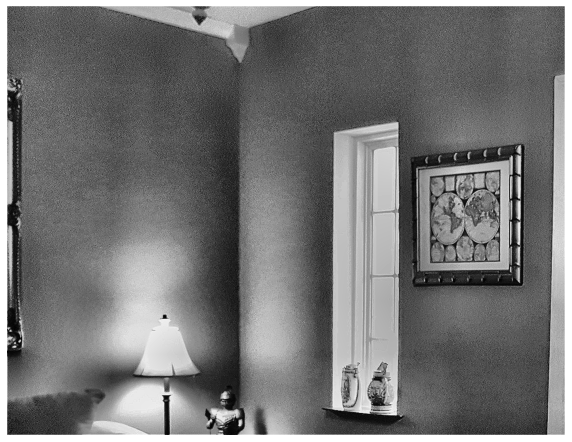

In [21]:
import numpy as np
import scipy
from skimage import io, color
from skimage import exposure
import matplotlib.pyplot as plt
%matplotlib inline

img = io.imread('images/image.jpg')    # Load the image
img = color.rgb2gray(img)       # Convert the image to grayscale (1 channel)


#kernel = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
kernel = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
#kernel = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])  #edge detection
# kernel = np.array([[1,1,1],[1,1,1],[1,1,1]])/9.0   #box blur
#kernel = np.array([[-1,-1,-1],[2,2,2],[-1,-1,-1]])
#kernel = np.array([[-2,4,-2],[-2,4,-2],[-2,4,-2]])

# you can use 'valid' instead of 'same', then it will not add zero padding
image_sharpen = scipy.signal.convolve2d(img, kernel, 'same')
#print '\n First 5 columns and rows of the image_sharpen matrix: \n', image_sharpen[:5,:5]*255


# Adjust the contrast of the filtered image by applying Histogram Equalization 
image_sharpen_equalized = exposure.equalize_adapthist(image_sharpen/np.max(np.abs(image_sharpen)), clip_limit=0.03)

fig = plt.figure(figsize=(10,10))

plt.imshow(image_sharpen_equalized, cmap=plt.cm.gray)
plt.axis('off')
plt.show()

### Learning team exercise: 
Isolate the edges, sharpen the image using appropriate kernels.


We can see from the above exercise that the filters emphasize a specific set of features. Another example is shown below, try to duplicate.

<img src="./images/effect_filters.png" width="700">

There is nothing new with the idea of convolution, it has been used to isolate pictures of a given image and the list of most common kernels can be seen here: https://en.wikipedia.org/wiki/Kernel_(image_processing)


<img src="./images/Convolution_Image.png" width="600">

### <p> <span style="color:green">Break out rooms (10 minutes): Play around with the filters and share interesting findings if any from your team's experiments! </span></p>

## 3. Subsampling or Pooling

Subsampling is typically applied in two forms of pooling operations in convolutional neural networks: **max-pooling** and **mean-pooling** (also known as **average-pooling**). Here, max-pooling takes the maximum value from a neighborhood of pixels, and mean-pooling computes their average. The pooling layer is usually denoted by $\mathbf{P}_{n1×n2}$. Here, the subscript determines the size of the neighborhood (the number of adjacent pixels in each dimension), where the max or mean operation is performed. We refer to such a neighborhood as the pooling size.


The advantage of pooling is two-fold:

• **Pooling (max-pooling)** introduces some sort of local invariance. This means that small changes in a local neighborhood do not change the result of max-pooling. Therefore, it helps generate features that are more robust to noise in the input data. See the following example that shows max-pooling of two different input matrices $\mathbf{X}_1$ and $\mathbf{X}_2$ results in the same output.     

<img src="./images/max_pooling.png" width="700">

• **Pooling** Pooling decreases the size of features, which results in higher computational efficiency. Furthermore, reducing the number of features may reduce the degree of overfitting as well.



Note: Traditionally, pooling is assumed to be nonoverlapping. Pooling is typically performed on nonoverlapping neighborhoods, which can be done by setting the stride parameter equal to the pooling size. For example, a nonoverlapping pooling layer $\mathbf{P}_{n1×n2}$ requires
a stride parameter $s=(n_1, n_2)$.    

On the other hand, overlapping pooling occurs if the stride is smaller than pooling size. An example where overlapping pooling is used in a convolutional network is described in ImageNet Classification with Deep Convolutional Neural Networks, A. Krizhevsky, I. Sutskever, and G. Hinton, 2012, which is freely available as a manuscript at https://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutionalneural-networks.

## 4. Putting everything together to build a CNN

So far, we've learned about the basic building blocks of convolutional neural networks. The concepts illustrated in this chapter are not really more difficult than traditional multilayer neural networks. Intuitively, we can say that the most important operation in a traditional neural network is the matrix-vector multiplication. For instance, we use matrix-vector multiplications to pre-activations (or net input) as in $\mathbf{a}$ =$\mathbf{W} \mathbf{x}$ + $b$ . Here, $\mathbf{x}$ is a column vector representing pixels, and $\mathbf{W}$ is the weight matrix connecting the pixel inputs to each hidden unit.    

In a convolutional neural network, this operation is replaced by a convolution operation, as in $\mathbf{A}$ =$\mathbf{W} \mathbf{X}$ + $b$, where $\mathbf{X}$ is a matrix representing the pixels in a height $x$ width arrangement. In both cases, the pre-activations are passed to an activation function to obtain the activation of a hidden unit $\mathbf{H}$ =$ \Phi(\mathbf{A})$, where $\Phi$ is the activation function. Furthermore, recall that subsampling is another building block of a convolutional neural network, which may appear in the form of pooling, as we described in the previous section.

<img src="./images/CNN_basic_architecture.png" width="700">

Shown below is another representation of how the convolutional layer is used

<img src="./images/CNN_layer1.png" width="700">

Convolutions operate over 3D tensors, called **feature maps**, with two spatial axes (height and width) as well as a depth axis (also called the channels axis). For an RGB image, the dimension of the depth axis is 3, because the image has three color channels: red, green, and blue. For a black-and-white picture, like the MNIST digits in the next example, the depth is 1 (levels of gray). The convolution operation extracts patches from its input feature
map and applies the same transformation to all of these patches, producing an output feature map. This output feature map is still a 3D tensor: it has a width and a height. Its depth can be arbitrary, because the output depth is a parameter of the layer, and the different channels in that depth axis no longer stand for specific colors as in RGB input; rather, they stand for filters. Filters encode specific aspects of the input data: at a
high level, a single filter could encode the concept “presence of a face in the input,” for instance.


<img src="./images/cat_CNN.png" width="500">

## Example 4. MNIST data set using a small CNN


A CNN or convnet takes as input tensors of shape (image_height, image_width, image_channels) (not including the batch dimension). In this case, we’ll configure the convnet to process inputs of size (28, 28, 1), which is the format of MNIST images. We’ll do this by passing the argument input_shape=(28, 28, 1) to the first layer. By default each feature map has a bias inherently added in keras.

**Instantiating a small convnet**

In [9]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)

outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

2022-01-17 09:06:38.224887: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-01-17 09:06:40.009856: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 10419 MB memory:  -> device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:85:00.0, compute capability: 6.1


Let’s display the architecture of the convnet so far, explain the Parameter numbers:

In [10]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0     

You can see that the output of every Conv2D and MaxPooling2D layer is a 3D tensor of shape (height, width, channels). The width and height dimensions tend to shrink as you go deeper in the network. The number of channels is controlled by the first argument passed to the Conv2D layers (32 or 64).

The 320 parameters in the first layer is because each image is convolved to a kernel/filter (weight) equal to (3 $\times$ 3) using 32 feature maps (3 $\times$ 3 $\times$ 32 = 9 $\times$ 32 = 288). Add a bias node for each of kernel in the 32 feature maps (1 $\times$ 32=32), and the total parameters is 288 + 32 = 320.

Max pooling will not add any new parameter but passing it into another 3 $\times$ 3 filter this time producing 64 feature maps for every 32 feature maps previously produce we have a total of  (32 $\times$ 64  $\times$ 3  $\times$ 3 =18,432) parameters. Add to this the bias for each of the 64 feature maps and the total is (18,432 + 64) 18,496. The process continues for the suceeding layers.


The last step is to feed the last output tensor (of shape (3, 3, 64)) into a densely connected classifier network like those you’re already familiar with: a stack of Dense layers. These classifiers process vectors, which are 1D, whereas the current output is a 3D tensor. First we have to flatten the 3D outputs to 1D, and then add a few Dense layers on top.

<img src="./images/CNN_full.png" width="700">

We’ll do 10-way classification, using a final layer with 10 outputs and a softmax activation.
Here’s what the network looks like now:

In [11]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0     

As you can see above, the (3, 3, 64) outputs are flattened into vectors of shape (576,) before going through two Dense layers. The total parameters if we use a 64 hidden nodes on the flattened 576 features is (64 $\times$ 576 = 36,864) plus a built in biased in each of the 64 hidden nodes we get 36,928. Another small layer is added that contributes (64 $\times$ 10 + 10 = 650) parameters.


Now, let’s train the convnet on the MNIST digits. We’ll reuse a lot of the code from the MNIST example

**Training the convnet on MNIST images**

In [12]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255

model.compile(optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])

model.fit(train_images, train_labels, epochs=5, batch_size=64)

2022-01-17 09:06:43.320643: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5


2022-01-17 09:06:45.516846: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8101
2022-01-17 09:06:46.209712: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-01-17 09:06:46.210772: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-01-17 09:06:46.210861: W tensorflow/stream_executor/gpu/asm_compiler.cc:77] Couldn't get ptxas version string: Internal: Couldn't invoke ptxas --version
2022-01-17 09:06:46.212301: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2022-01-17 09:06:46.212507: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Internal: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


938/938 [==============================] - 10s 7ms/step - loss: 0.1563 - accuracy: 0.9517
Epoch 2/5
938/938 [==============================] - 6s 7ms/step - loss: 0.0437 - accuracy: 0.9859
Epoch 3/5
938/938 [==============================] - 6s 7ms/step - loss: 0.0296 - accuracy: 0.9907
Epoch 4/5
938/938 [==============================] - 6s 7ms/step - loss: 0.0225 - accuracy: 0.9933
Epoch 5/5
938/938 [==============================] - 6s 7ms/step - loss: 0.0185 - accuracy: 0.9941


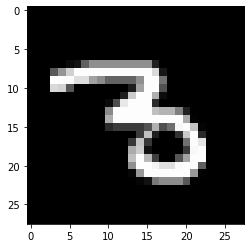

train label = 3


In [13]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


sample_number =30
first_image = train_images[sample_number]
first_image = np.array(first_image, dtype='float')
pixels = first_image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()
print("train label =", train_labels[sample_number])

### Let’s evaluate the model on the test data:

In [14]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 4ms/step - loss: 0.0332 - accuracy: 0.9914


In [15]:
test_acc

0.9914000034332275

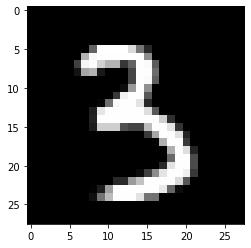

test label = 3


In [16]:
sample_number =32
first_image = test_images[sample_number]
first_image = np.array(first_image, dtype='float')
pixels = first_image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()
print("test label =", test_labels[sample_number])

Predicted label = 6


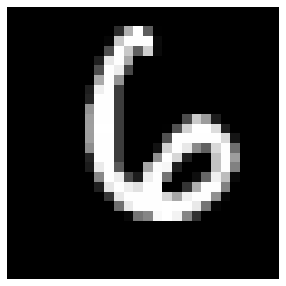

In [17]:
img = test_images[88].reshape(1,28,28,1)
fig = plt.figure(figsize=(5,5))
plt.imshow(img[0,:,:,0],cmap="gray")
plt.axis('off')

pred_label = model.predict(img)
print(f"Predicted label = {np.argmax(pred_label)}")

Predicted number:  8


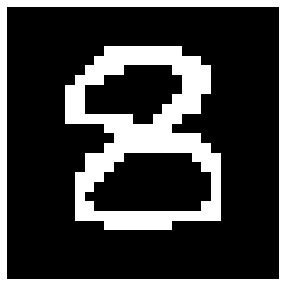

In [18]:
from keras.preprocessing import image
from PIL import Image
import PIL.ImageOps  


img_path = 'images/8_test.png'
img = image.load_img(img_path, target_size=(28, 28), color_mode="grayscale")
img_invert = PIL.ImageOps.invert(img)
x = image.img_to_array(img_invert)

img = x.reshape(1,28,28,1)


fig = plt.figure(figsize=(5,5))
plt.imshow(img[0,:,:,0],cmap="gray")
plt.axis('off')


Prediction = model.predict(img)
print("Predicted number: ", np.argmax(Prediction))

### <p> <span style="color:green">Break out rooms (10 minutes): Play around with our basic CNN and share interesting findings if any from your team's experiments! </span></p>

## Reading Assignments: Below are additional resource in re-implementing the above: 

[A]. https://towardsdatascience.com/visualizing-intermediate-activations-of-a-cnn-trained-on-the-mnist-dataset-2c34426416c8

[B] https://towardsdatascience.com/visualizing-intermediate-activation-in-convolutional-neural-networks-with-keras-260b36d60d0

1. Note how the middle layers are being formed in [A] and [B]. Read the conclusions at the end of their discussion. Are these intuitive to you now?
2. Check how the best parameters are saved using "checkpointer" in [B]

[C] Here are list of available data for potential individual/group projects: https://en.wikipedia.org/wiki/List_of_datasets_for_machine_learning_research


# 5. Supporting ideas

## 5.1 What does "sample", "batch", "epoch" mean?

Below are some common definitions that are necessary to know and understand to correctly utilize Keras:

**Sample**: one element of a dataset.   

**Example**: one image is a sample in a convolutional network   
**Example**: one audio file is a sample for a speech recognition model   

**Batch**: a set of N samples. The samples in a batch are processed independently, in parallel. If training, a batch results in only one update to the model.   
A batch generally approximates the distribution of the input data better than a single input. The larger the batch, the better the approximation; however, it is also true that the batch will take longer to process and will still result in only one update. For inference (evaluate/predict), it is recommended to pick a batch size that is as large as you can afford without going out of memory (since larger batches will usually result in faster evaluating/prediction). 

**Epoch**: an arbitrary cutoff, generally defined as "one pass over the entire dataset", used to separate training into distinct phases, which is useful for logging and periodic evaluation. When using evaluation_data or evaluation_split with the fit method of Keras models, evaluation will be run at the end of every epoch.  

## 5.2 Cheat Sheet Error Function

Below is a general strategy on what Error function to use given the final activation function.

<img src="./images/cheat_sheet_error_function1.png" width="700">

### Activation functions 

Given below are the most common and most successful activation functions

RELU - REctified Linear Unit function
<img src="./images/relu.png" width="300">

Sigmoid
<img src="./images/sigmoid.png" width="300">



Softmax is normalized exponential given by:

\begin{equation}
P(j,\mathbf{x}) = \frac{\exp(\mathbf{w}_j \mathbf{x}^T)}{\sum_{k=1}^K \exp(\mathbf{w}_k \mathbf{x}^T)}
\end{equation}

<img src="./images/softmax.png" width="400">

https://developers.google.com/machine-learning/crash-course/multi-class-neural-networks/softmax


In [19]:
import numpy as np
z = [1.0, 2.0, 3.0, 4.0, 1.0, 2.0, 3.0]
softmax = np.exp(z)/np.sum(np.exp(z))
softmax

array([0.02364054, 0.06426166, 0.1746813 , 0.474833  , 0.02364054,
       0.06426166, 0.1746813 ])


### Error functions

Below are the implementation of the error functions [$yHAT$ = output of NN ($\Psi_{NN}$), y = theoretical output ($\Psi_{th}$]:

     

**MSE (Mean Square Error):** Usually used for regresssion problems

$\frac{1}{2}(yHat - y)^2$


**Binary Cross Entropy:** Use for classification problems, Outputs are independent for each class or the loss computed for every output is not affected by other outputs.

$−(y \log(yHat)+(1−y)\log(1−yHat))$

**Categorical Cross Entropy:** Use for classification problems, outputs are dependent for each class or the loss computed for every output is affected by the computed outputs of other classes (most widely used activation is softmax as described in the above cell).

$-\sum_{c=1}^{M} y_{o,c} \log (p_{o,c})$


M - number of classes (dog, cat, fish, birds)           
y - binary indicator (0 or 1) if class label c is the correct classification for observation o      
p - predicted probability observation o is of class c   

https://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html

Given below are the implementations in numpy for the above function

In [20]:
def MSE(yHat, y):
    return np.sum((yHat - y)**2) / y.size


#Binary Cross Entropy
def CrossEntropy(yHat, y):
    if y == 1:
        return -log(yHat)
    else:
        return -log(1 - yHat)

### Optimizer

The rmsprop optimizer is generally a good enough choice, whatever your problem. That’s one less thing for you to worry about.
